In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_train_y.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_train_meta (1).csv
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_valid_y.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_valid_x.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_train_mask.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_test_y.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_train_x.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_valid_meta (1).csv
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_test_meta (1).csv
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_test_x.h5
/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_test_meta (2).csv


ROC AUC: 0.50
Average Precision: 0.50
Negative Log-Likelihood: 1.00
Precision: 0.50
Recall: 0.50
Confusion Matrix:
[[65591 65481]
 [65533 65539]]


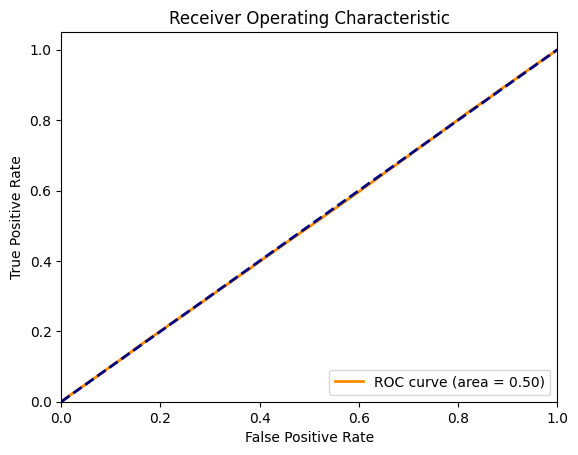

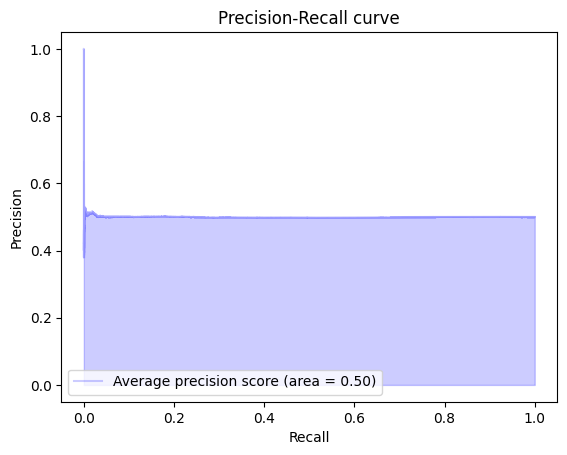

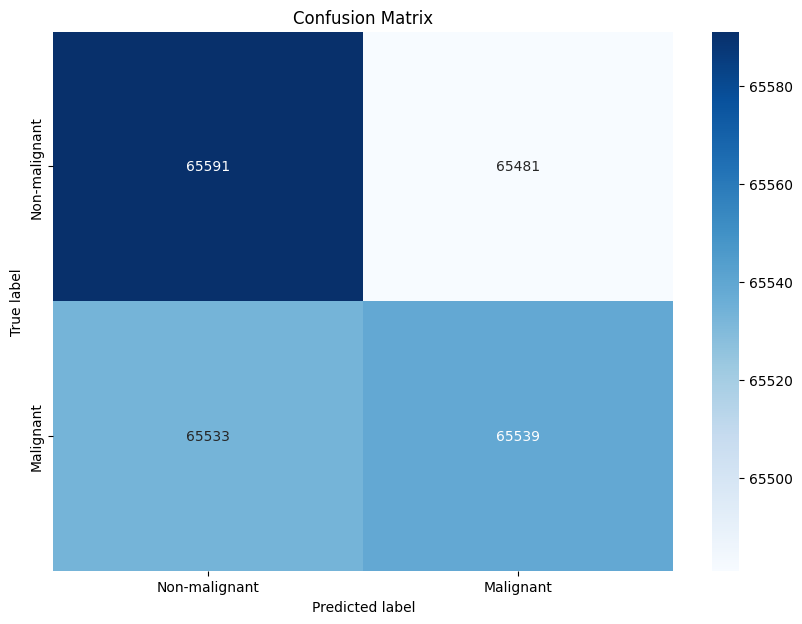

In [2]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, confusion_matrix, log_loss, precision_score, recall_score

# Define the paths to your HDF5 files
train_x = '/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_train_x.h5'
valid_x = '/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_valid_x.h5'
test_x =    '/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_test_x.h5'

train_y = '/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_train_y.h5'
valid_y = '/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_valid_y.h5'
test_y = '/kaggle/input/pcam-dataset/camelyonpatch_level_2_split_test_y.h5'

# Function to load datasets
def load_h5_dataset(file_path, key='x'):
    with h5py.File(file_path, 'r') as f:
        return np.array(f[key])

# Load the datasets
x_train = load_h5_dataset(train_x, 'x')
x_valid = load_h5_dataset(valid_x, 'x')
x_test = load_h5_dataset(test_x, 'x')

y_train = load_h5_dataset(train_y, 'y')
y_valid = load_h5_dataset(valid_y, 'y')
y_test = load_h5_dataset(test_y, 'y')

# Reshape the labels if needed (assuming they are stored as 1D arrays in HDF5)
y_train = y_train.reshape(-1)
y_valid = y_valid.reshape(-1)
y_test = y_test.reshape(-1)

# Function to plot ROC Curve
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Function to plot Precision-Recall Curve
def plot_precision_recall_curve(precision, recall, average_precision):
    plt.figure()
    plt.step(recall, precision, where='post', color='b', alpha=0.2, label='Average precision score (area = %0.2f)' % average_precision)
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall curve')
    plt.legend(loc="lower left")
    plt.show()

# Function to plot Confusion Matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix')
    plt.show()

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_y_true = []
all_y_pred = []
all_y_prob = []

# Assuming you have a model already defined and trained; here is a placeholder function
# Replace with your actual model training and prediction logic
def train_and_predict_model(x_train_fold, y_train_fold, x_valid_fold):
    # Placeholder for model training
    # model.fit(x_train_fold, y_train_fold)
    
    # Placeholder for model predictions
    # y_pred_fold = model.predict(x_valid_fold)
    # y_prob_fold = model.predict_proba(x_valid_fold)[:, 1]  # Assuming binary classification
    
    # Dummy prediction for demonstration
    y_pred_fold = np.random.randint(2, size=len(x_valid_fold))
    y_prob_fold = np.random.rand(len(x_valid_fold))
    return y_pred_fold, y_prob_fold

# Perform cross-validation
for train_index, valid_index in kf.split(x_train):
    x_train_fold, x_valid_fold = x_train[train_index], x_train[valid_index]
    y_train_fold, y_valid_fold = y_train[train_index], y_train[valid_index]
    
    y_pred_fold, y_prob_fold = train_and_predict_model(x_train_fold, y_train_fold, x_valid_fold)
    
    all_y_true.extend(y_valid_fold)
    all_y_pred.extend(y_pred_fold)
    all_y_prob.extend(y_prob_fold)

# Convert to numpy arrays for evaluation
all_y_true = np.array(all_y_true)
all_y_pred = np.array(all_y_pred)
all_y_prob = np.array(all_y_prob)

# Calculate metrics
roc_auc = roc_auc_score(all_y_true, all_y_prob)
precision, recall, thresholds = precision_recall_curve(all_y_true, all_y_prob)
average_precision = auc(recall, precision)
nll = log_loss(all_y_true, all_y_prob)
cm = confusion_matrix(all_y_true, all_y_pred)
precision_score_value = precision_score(all_y_true, all_y_pred)
recall_score_value = recall_score(all_y_true, all_y_pred)

# Print metrics
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Average Precision: {average_precision:.2f}")
print(f"Negative Log-Likelihood: {nll:.2f}")
print(f"Precision: {precision_score_value:.2f}")
print(f"Recall: {recall_score_value:.2f}")
print("Confusion Matrix:")
print(cm)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(all_y_true, all_y_prob)
plot_roc_curve(fpr, tpr, roc_auc)

# Plot Precision-Recall Curve
plot_precision_recall_curve(precision, recall, average_precision)

# Plot Confusion Matrix
plot_confusion_matrix(cm, classes=['Non-malignant', 'Malignant'])

# FROC (Free-response Receiver Operating Characteristic) curve can be plotted similarly, depending on your data and requirement. 
# FROC is more complex and specific to certain applications like medical image analysis where multiple instances need to be detected.


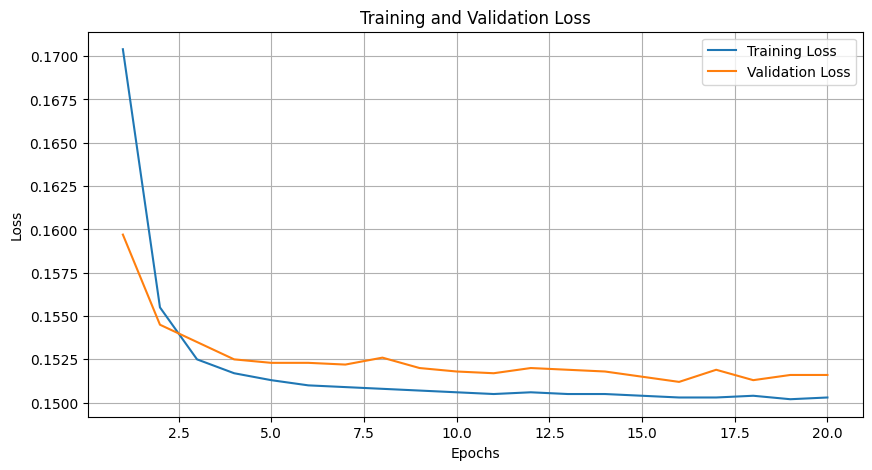

In [1]:
import matplotlib.pyplot as plt

# Provided data
epochs = list(range(1, 21))
train_loss = [0.1704, 0.1555, 0.1525, 0.1517, 0.1513, 0.1510, 0.1509, 0.1508, 0.1507, 0.1506, 
              0.1505, 0.1506, 0.1505, 0.1505, 0.1504, 0.1503, 0.1503, 0.1504, 0.1502, 0.1503]
val_loss = [0.1597, 0.1545, 0.1535, 0.1525, 0.1523, 0.1523, 0.1522, 0.1526, 0.1520, 0.1518,
            0.1517, 0.1520, 0.1519, 0.1518, 0.1515, 0.1512, 0.1519, 0.1513, 0.1516, 0.1516]

# Plotting the data
plt.figure(figsize=(10, 5))
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


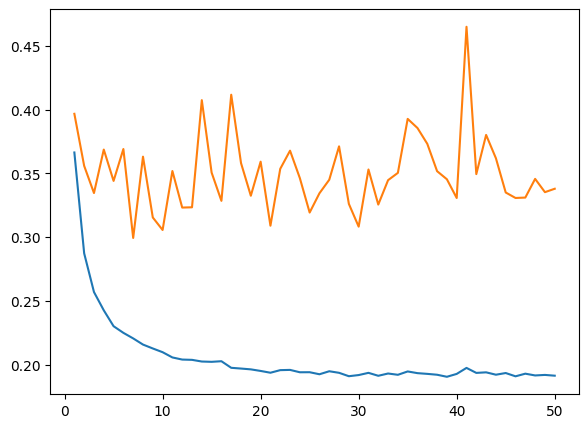

In [4]:
import matplotlib.pyplot as plt

epochs = range(1, 51)

loss = [
    0.3664279879485548, 0.28736752023905865, 0.2570579081220785, 0.2427320228307508, 0.23027967222969892,
    0.22507681714523642, 0.22071314111144602, 0.21588828577296226, 0.21283128669165308, 0.20991346101527597,
    0.205797539021205, 0.20413617102622084, 0.2039134349570304, 0.2025991724412961, 0.20236220287915785,
    0.20283703531913488, 0.19767635181142396, 0.19709103244531434, 0.19645800014495762, 0.19522004995360476,
    0.19381259037254495, 0.19584795187074633, 0.19604046465337888, 0.1941791815088436, 0.1942206208468633,
    0.1926181146172894, 0.19497448753372737, 0.19375219388894038, 0.19108949410201603, 0.19199453760938923,
    0.19372561118507292, 0.19142482038296293, 0.19321052168379538, 0.19219644450458873, 0.19482183267882647,
    0.1934892128147112, 0.19292168198535364, 0.19224187329382403, 0.19064652290126105, 0.19289472117361584,
    0.197595165459461, 0.1936858146909799, 0.19412596349502564, 0.19226672974036774, 0.19358576456761512,
    0.19100756177977019, 0.19307471423417155, 0.1916864178410833, 0.1921012890379643, 0.19149575545361586
]

val_loss = [
    0.39673291056533344, 0.35592713809455745, 0.33463836801820435, 0.3687003161176108, 0.344140623594285,
    0.3691320601501502, 0.2994447319942992, 0.36313994985539466, 0.3154949076997582, 0.30568549208692275,
    0.35190383142617065, 0.3232551618566504, 0.32346891329507343, 0.40742722831782885, 0.35067250549036544,
    0.3285173066833522, 0.4116881161899073, 0.3581024923187215, 0.33252099704986904, 0.3592220561549766,
    0.3090457132930169, 0.35360702544858214, 0.3678389827837236, 0.34634073183406144, 0.3193539621133823,
    0.3344626719481312, 0.3450599628413329, 0.37123216621694155, 0.32614101641229354, 0.30830543019692414,
    0.35309606029477436, 0.32560518314130604, 0.34472449294116814, 0.3504492730135098, 0.39275164177524857,
    0.38558167073642835, 0.37321111529308837, 0.3517695091722999, 0.3454330728563946, 0.3307482154050376,
    0.46493602258124156, 0.34948479977902025, 0.3801784451279673, 0.36189596449548844, 0.3350635347305797,
    0.3307726779021323, 0.331096047651954, 0.3457304974581348, 0.33532655774615705, 0.3379996484000003
]

val_accuracy = [
    81.243896484375, 83.1695556640625, 84.55810546875, 83.5906982421875, 83.9324951171875, 83.349609375,
    86.846923828125, 83.50830078125, 85.60791015625, 86.0626220703125, 83.843994140625, 85.2996826171875,
    85.1165771484375, 81.9732666015625, 83.282470703125, 85.1043701171875, 81.5704345703125, 83.941650390625,
    84.8297119140625, 84.210205078125, 86.6943359375, 84.1552734375, 82.55615234375, 83.612060546875,
    86.0595703125, 85.443115234375, 85.1806640625, 83.831787109375, 86.029052734375, 86.6912841796875,
    84.0423583984375, 85.0677490234375, 84.527587890625, 82.2540283203125, 83.0322265625, 83.685302734375,
    83.544921875, 84.09423828125, 85.052490234375, 79.888916015625, 84.9090576171875, 83.709716796875,
    84.2987060546875, 85.540771484375, 85.1959228515625, 85.1959228515625, 85.1959228515625, 85.1959228515625,
    84.9822998046875
]

plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')

